In [11]:
from numpy import *
from matplotlib import *
from pylab import *
import pandas as pd
from matplotlib.colors import ListedColormap

In [12]:
def XS(G1,gamma):
    x=sqrt(2.0)*(gamma/G1)
    return x

In [13]:
def BS(G1,gamma):
    b=-gamma/4.0
    return b

In [14]:
def YS(G1,gamma):
    v0=0.5
    G=-10.0
    c=(G*gamma)**2 + (gamma*G1)**2 + 8*(G1**2)*v0
    d=(gamma**2)*G1 + 8*G1*v0
    y=(2*gamma*G + 2*sqrt(c))/d
    return y

In [15]:

def jacobian(G1,gamma):
    G=-10.0
    v0=0.5
    
    x=XS(G1,gamma)
    b=BS(G1,gamma)
    y=YS(G1,gamma)

    J11=2*(gamma - b)-(5*G1*x)/sqrt(2)
    J12=0
    J13=-2*x
    
    J21=G1*y/sqrt(2)
    J22=4*b+G1*x/sqrt(2)
    J23=4*y

    J31=G/(y*2*sqrt(2))
    J32=-1/(y**3)-(G*x)/((y**2)*2*sqrt(2))
    J33=-4*b
    
    J = array([
        [J11,J12,J13], 
        [J21,J22,J23],  
        [J31,J32,J33]  
        ])
    return J

In [16]:
 def is_stable(G1, gamma):
    J = jacobian(G1, gamma)
    eigenvalues = linalg.eigvals(J)
    return all(real(eigenvalues) < 0)

In [17]:
print(is_stable(0.1,0.0001))

False


In [18]:
gamma_vals = logspace(-5, 0, 100)
g1_vals = logspace(-5, 0, 100)
stability_grid = zeros((len(g1_vals), len(gamma_vals)))
ei=len(g1_vals)

In [19]:
#f = open('stabilitydata.txt', 'w')
for i in range(0,ei):
    for j in range(0,ei):
        #print(g1_vals[i],gamma_vals[j])
        stability_grid[i,j]=is_stable(g1_vals[i],gamma_vals[j])
        
        #f.write(f"{g1_vals[i]} {gamma_vals[j]} {stability_grid[i, j]}\n")

#f.close() 

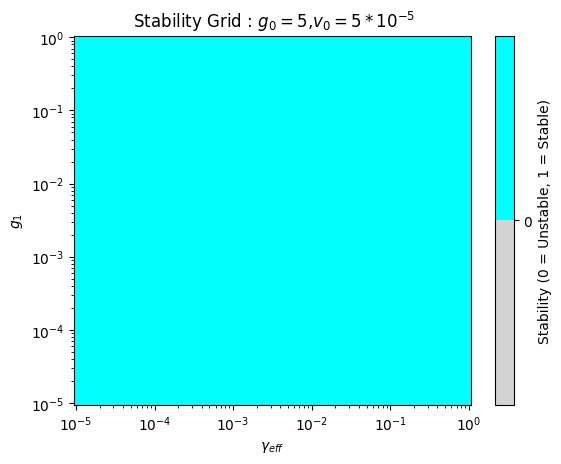

In [20]:
#figure(figsize=(6, 6))
X, Y = meshgrid(gamma_vals, g1_vals)
custom_cmap = ListedColormap(['lightgray', (0.0, 1.0, 1.0)])
pcolormesh(X, Y, stability_grid, cmap=custom_cmap,shading='auto')

colorbar(ticks=[0, 1], label='Stability (0 = Unstable, 1 = Stable)')
xlabel('$\\gamma_{eff}$')
ylabel('$g_{1} $')
title(' Stability Grid : $g_{0}=5 $,$v_0=5*10^{−5}$ ')

xscale('log')
yscale('log')
savefig("sbrT.png",bbox_inches='tight')
show()
